Implementing Feedforward neural networks with Keras and TensorFlow for
classification of hand-written MNIST dataset using below steps:
a. Import the necessary packages
b. Load the training and testing data
c. Define the network architecture using Keras
d. Train the model using SGD with 11 epochs
e. Evaluate the network
f. Plot the training loss and accuracy

In [3]:
# Cell 1: Import the required libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Cell 2: Load training and testing data from separate CSV files
train_df = pd.read_csv('mnist/mnist_train.csv')
test_df = pd.read_csv('mnist/mnist_test.csv')

# Separate features and labels
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [7]:
# Cell 3: Reshape and normalize pixel values
# Convert flat 784-element vectors into 28×28 images and scale pixels to [0, 1]
x_train = x_train.reshape(-1, 28, 28) / 255.0
x_test = x_test.reshape(-1, 28, 28) / 255.0

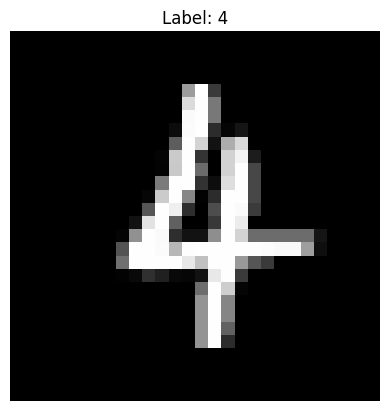

In [24]:
# Pick an index (e.g., 0 for the first image)
index = 292

# Display the image
plt.imshow(x_train[index], cmap='gray')  # grayscale color map
plt.title(f"Label: {y_train[index]}")
plt.axis('off')
plt.show()

In [8]:
# Cell 4: Define the Feedforward Neural Network (FNN) architecture
# - Flatten layer converts 28x28 input into a 784-dimensional vector
# - Dense layer (128 neurons, ReLU) acts as the hidden layer
# - Dense layer (10 neurons, softmax) is the output layer for 10 digits
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Display model summary
model.summary()

C:\Users\saira\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Cell 5: Compile the model
# - Optimizer: SGD (Stochastic Gradient Descent)
# - Loss: Sparse categorical crossentropy (integer labels)
# - Metric: Accuracy
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Cell 6: Train the model for 10 epochs
# Validation data helps monitor performance during training
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8395 - loss: 0.6423 - val_accuracy: 0.9069 - val_loss: 0.3523
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9084 - loss: 0.3315 - val_accuracy: 0.9189 - val_loss: 0.2961
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9214 - loss: 0.2829 - val_accuracy: 0.9294 - val_loss: 0.2570
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9293 - loss: 0.2531 - val_accuracy: 0.9345 - val_loss: 0.2327
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9355 - loss: 0.2308 - val_accuracy: 0.9383 - val_loss: 0.2162
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9406 - loss: 0.2130 - val_accuracy: 0.9415 - val_loss: 0.2027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9446 - loss: 0.1982 - val_accuracy: 0.9445 - val_loss: 0.1915
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9481 - loss: 0.1853 - 

In [11]:
# Cell 7: Evaluate the trained model on test dataset
# Outputs test loss and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9533 - loss: 0.1633
Loss=0.163
Accuracy=0.953


In [12]:
# Cell 8: Display available metrics recorded during training
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

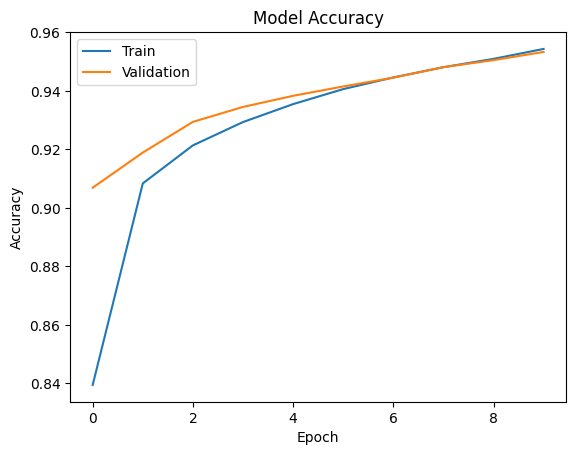

In [13]:
# Cell 9: Plot training and validation accuracy across epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

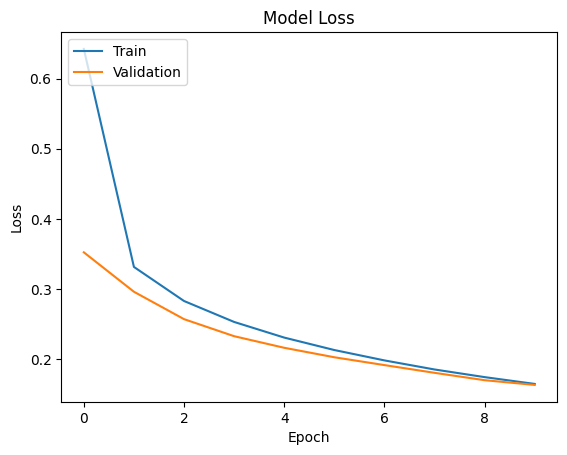

In [14]:
# Cell 10: Plot training and validation loss across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()